# 4.F1 Prediction Project -Model Notebook V1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:
# Load DataFrame
file = 'model_data.csv'
df = pd.read_csv(file)

In [ ]:
df.info(verbose=True, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    race_index                               int64  
 1    year                                     int64  
 2    driverId                                 int64  
 3    F2_champion                              bool   
 4    Former_F1_World_Champion                 bool   
 5    home_race                                bool   
 6    constructorId                            int64  
 7    starting_grid_position                   int64  
 8    points_in_previous_race                  float64
 9    laps_in_previous_race                    float64
 10   race_win                                 bool   
 11   new_index                                int64  
 12   constructorId_points_at_stage_of_season  float64
 13   driver_points_at_stage_of_season         float64
 14   race

In [ ]:
pd.set_option('display.max_columns', None)

df.head()

,race_index,year,driverId,F2_champion,Former_F1_World_Champion,home_race,constructorId,starting_grid_position,points_in_previous_race,laps_in_previous_race,race_win,new_index,constructorId_points_at_stage_of_season,driver_points_at_stage_of_season,race_70th Anniversary Grand Prix,race_Abu Dhabi Grand Prix,race_Argentine Grand Prix,race_Australian Grand Prix,race_Austrian Grand Prix,race_Azerbaijan Grand Prix,race_Bahrain Grand Prix,race_Belgian Grand Prix,race_Brazilian Grand Prix,race_British Grand Prix,race_Canadian Grand Prix,race_Chinese Grand Prix,race_Dutch Grand Prix,race_Eifel Grand Prix,race_Emilia Romagna Grand Prix,race_European Grand Prix,race_French Grand Prix,race_German Grand Prix,race_Hungarian Grand Prix,race_Indian Grand Prix,race_Italian Grand Prix,race_Japanese Grand Prix,race_Korean Grand Prix,race_Luxembourg Grand Prix,race_Malaysian Grand Prix,race_Mexican Grand Prix,race_Mexico City Grand Prix,race_Miami Grand Prix,race_Monaco Grand Prix,race_Pacific Grand Prix,race_Portuguese Grand Prix,race_Qatar Grand Prix,race_Russian Grand Prix,race_Sakhir Grand Prix,race_San Marino Grand Prix,race_Saudi Arabian Grand Prix,race_Singapore Grand Prix,race_Spanish Grand Prix,race_Styrian Grand Prix,race_SÃ£o Paulo Grand Prix,race_Turkish Grand Prix,race_Tuscan Grand Prix,race_United States Grand Prix,engine_manufacturer_Acer,engine_manufacturer_Arrows,engine_manufacturer_Asiatech,engine_manufacturer_BMW,engine_manufacturer_Cosworth,engine_manufacturer_Ferrari,engine_manufacturer_Ford,engine_manufacturer_Hart,engine_manufacturer_Honda,engine_manufacturer_Mecachrome,engine_manufacturer_Mercedes,engine_manufacturer_Mugen-Honda,engine_manufacturer_Petronas,engine_manufacturer_Peugeot,engine_manufacturer_Playlife,engine_manufacturer_Red Bull,engine_manufacturer_Renault,engine_manufacturer_Supertec,engine_manufacturer_Toro Rosso,engine_manufacturer_Toyota,engine_manufacturer_Yamaha,constructor_nationality_American,constructor_nationality_Austrian,constructor_nationality_British,constructor_nationality_Dutch,constructor_nationality_French,constructor_nationality_German,constructor_nationality_Indian,constructor_nationality_Irish,constructor_nationality_Italian,constructor_nationality_Japanese,constructor_nationality_Malaysian,constructor_nationality_Russian,constructor_nationality_Spanish,constructor_nationality_Swiss,Nationality_American,Nationality_Argentine,Nationality_Australian,Nationality_Austrian,Nationality_Belgian,Nationality_Brazilian,Nationality_British,Nationality_Canadian,Nationality_Chinese,Nationality_Colombian,Nationality_Czech,Nationality_Danish,Nationality_Dutch,Nationality_Finnish,Nationality_French,Nationality_German,Nationality_Hungarian,Nationality_Indian,Nationality_Indonesian,Nationality_Irish,Nationality_Italian,Nationality_Japanese,Nationality_Malaysian,Nationality_Mexican,Nationality_Monegasque,Nationality_New Zealander,Nationality_Polish,Nationality_Portuguese,Nationality_Russian,Nationality_Spanish,Nationality_Swedish,Nationality_Swiss,Nationality_Thai,Nationality_Venezuelan
0,2,1995,87,False,False,False,1,17,1.0,70.0,False,89,4.0,1.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,1995,57,False,False,False,1,5,3.0,70.0,False,59,4.0,3.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
df = df.drop('race_index', axis=1)

In [ ]:
df.head()

,year,driverId,F2_champion,Former_F1_World_Champion,home_race,constructorId,starting_grid_position,points_in_previous_race,laps_in_previous_race,race_win,new_index,constructorId_points_at_stage_of_season,driver_points_at_stage_of_season,race_70th Anniversary Grand Prix,race_Abu Dhabi Grand Prix,race_Argentine Grand Prix,race_Australian Grand Prix,race_Austrian Grand Prix,race_Azerbaijan Grand Prix,race_Bahrain Grand Prix,race_Belgian Grand Prix,race_Brazilian Grand Prix,race_British Grand Prix,race_Canadian Grand Prix,race_Chinese Grand Prix,race_Dutch Grand Prix,race_Eifel Grand Prix,race_Emilia Romagna Grand Prix,race_European Grand Prix,race_French Grand Prix,race_German Grand Prix,race_Hungarian Grand Prix,race_Indian Grand Prix,race_Italian Grand Prix,race_Japanese Grand Prix,race_Korean Grand Prix,race_Luxembourg Grand Prix,race_Malaysian Grand Prix,race_Mexican Grand Prix,race_Mexico City Grand Prix,race_Miami Grand Prix,race_Monaco Grand Prix,race_Pacific Grand Prix,race_Portuguese Grand Prix,race_Qatar Grand Prix,race_Russian Grand Prix,race_Sakhir Grand Prix,race_San Marino Grand Prix,race_Saudi Arabian Grand Prix,race_Singapore Grand Prix,race_Spanish Grand Prix,race_Styrian Grand Prix,race_SÃ£o Paulo Grand Prix,race_Turkish Grand Prix,race_Tuscan Grand Prix,race_United States Grand Prix,engine_manufacturer_Acer,engine_manufacturer_Arrows,engine_manufacturer_Asiatech,engine_manufacturer_BMW,engine_manufacturer_Cosworth,engine_manufacturer_Ferrari,engine_manufacturer_Ford,engine_manufacturer_Hart,engine_manufacturer_Honda,engine_manufacturer_Mecachrome,engine_manufacturer_Mercedes,engine_manufacturer_Mugen-Honda,engine_manufacturer_Petronas,engine_manufacturer_Peugeot,engine_manufacturer_Playlife,engine_manufacturer_Red Bull,engine_manufacturer_Renault,engine_manufacturer_Supertec,engine_manufacturer_Toro Rosso,engine_manufacturer_Toyota,engine_manufacturer_Yamaha,constructor_nationality_American,constructor_nationality_Austrian,constructor_nationality_British,constructor_nationality_Dutch,constructor_nationality_French,constructor_nationality_German,constructor_nationality_Indian,constructor_nationality_Irish,constructor_nationality_Italian,constructor_nationality_Japanese,constructor_nationality_Malaysian,constructor_nationality_Russian,constructor_nationality_Spanish,constructor_nationality_Swiss,Nationality_American,Nationality_Argentine,Nationality_Australian,Nationality_Austrian,Nationality_Belgian,Nationality_Brazilian,Nationality_British,Nationality_Canadian,Nationality_Chinese,Nationality_Colombian,Nationality_Czech,Nationality_Danish,Nationality_Dutch,Nationality_Finnish,Nationality_French,Nationality_German,Nationality_Hungarian,Nationality_Indian,Nationality_Indonesian,Nationality_Irish,Nationality_Italian,Nationality_Japanese,Nationality_Malaysian,Nationality_Mexican,Nationality_Monegasque,Nationality_New Zealander,Nationality_Polish,Nationality_Portuguese,Nationality_Russian,Nationality_Spanish,Nationality_Swedish,Nationality_Swiss,Nationality_Thai,Nationality_Venezuelan
0,1995,87,False,False,False,1,17,1.0,70.0,False,89,4.0,1.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1995,57,False,False,False,1,5,3.0,70.0,False,59,4.0,3.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [ ]:
# Perform train-test split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)  # You can adjust the test_size as needed

# Save training and testing data to separate CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

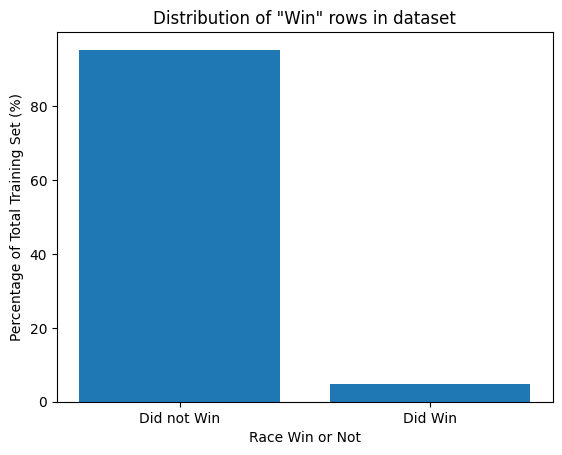

In [ ]:
# Get the normalized value counts for the 'race_win' column and multiply by 100 to get percentages
value_counts = train_data['race_win'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure()
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel('Race Win or Not')
plt.ylabel('Percentage of Total Training Set (%)')
plt.xticks([0, 1], ['Did not Win', 'Did Win'])
plt.title('Distribution of "Win" rows in dataset')
plt.show()

# 4. **Logistics Regression**

In [ ]:
# Define X and Y for the training model
X_train = train_data.drop('race_win', axis=1)
y_train = train_data['race_win']

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Create the logistic regression model
model = LogisticRegression()

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predict on the training data (to see how well the model does on the data it was trained on)
y_train_pred = model.predict(X_train_scaled)

In [ ]:
# Evaluate the model
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[8256   63]
 [ 311  106]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.98      8319
        True       0.63      0.25      0.36       417

    accuracy                           0.96      8736
   macro avg       0.80      0.62      0.67      8736
weighted avg       0.95      0.96      0.95      8736



In [ ]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline

my_pipeline = Pipeline([('scaler', StandardScaler()),
('dim_reducer', PCA()),
('model', LogisticRegression())], memory=cachedir)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Let's try the same range of C values from earlier
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Parameter grid
logreg_param_grid = [
    # L1 without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1, max_iter=100)],
     'model__C': c_values},

    # L1 with PCA
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l1', solver='liblinear', random_state=1, n_jobs=-1, max_iter=100)],
     'model__C': c_values},

    # L2 (default) without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, n_jobs=-1, max_iter=100)],
     'model__C': c_values},

    # L2 (default) with PCA
    {'scaler': [StandardScaler(), MinMaxScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, n_jobs=-1, max_iter=100)],
     'model__C': c_values}
]

# The parameter dim_reducer__n_components specifies the number of components to keep after reducing dimensions.
# For solver : "LogisticRegression (default solver: lbfgs): Offers various solver options (including liblinear, lbfgs, newton-cg, sag) are available, but I went with the default

In [ ]:
# Instantiate the log reg grid search
logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1)

# Fit the log reg grid search
fitted_logreg_gs = logreg_gs.fit(X_train, y_train)

In [ ]:
# Reviewing the results
print("Best parameters set found on development set:")
print(logreg_gs.best_params_)
print("Best score:", logreg_gs.best_score_)

In [ ]:
# Define X and Y for the training model
X_test = test_data.drop('race_win', axis=1)
y_test = test_data['race_win']

In [ ]:
# Making predictions using the best estimator
y_pred = logreg_gs.predict(X_test)

# logreg_gs.score(x_test,y_test)

In [ ]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 6. **Decision Tree**

In [ ]:
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])

In [ ]:
# create parameter grid for model
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': [1, 2, 3, 4, 5, 6],
                   'DT__max_depth': [1, 2, 3, 4, 5, 6],
                   'DT__min_samples_split': [2, 3, 4, 5, 6]}]

In [ ]:
# finally, create a gridsearchcv object with the param grid
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=5)

In [ ]:
# putting it all together
grids = [dt_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train)

In [ ]:
# find out performance of each model and best params
grid_dict = {0: 'Decision Trees'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],model.best_params_))

Decision Trees Test Accuracy: 0.9446224256292907
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 3, 'DT__min_samples_leaf': 4, 'DT__min_samples_split': 2}


In [ ]:
# Obtain predictions from the best decision tree model
y_pred_dt = dt_grid_search.best_estimator_.predict(X_test)

In [ ]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97      2077
        True       0.42      0.33      0.37       108

    accuracy                           0.94      2185
   macro avg       0.69      0.65      0.67      2185
weighted avg       0.94      0.94      0.94      2185

Decision Tree Confusion Matrix:
[[2028   49]
 [  72   36]]


# 7.  Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Fit the model
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict the test set
y_pred_rf = classifier.predict(X_test)

# Print the classification report and confusion matrix for Non-Tuned Random Forest
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


              precision    recall  f1-score   support

       False       0.96      0.99      0.97      2077
        True       0.49      0.24      0.32       108

    accuracy                           0.95      2185
   macro avg       0.73      0.61      0.65      2185
weighted avg       0.94      0.95      0.94      2185

[[2050   27]
 [  82   26]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'max_depth': 10, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)


Cross-validation scores: [0.95652174 0.96164854 0.95535203 0.95020034 0.95306239]


In [ ]:
import joblib

# Save the model
joblib.dump(classifier, 'finalized_model.pkl')

['finalized_model.pkl']

In [ ]:
# Load the model
loaded_model = joblib.load('finalized_model.pkl')

# Predict new data
new_data_predictions = loaded_model.predict(X_test)


In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, new_data_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9501144164759725


In [ ]:
# Detailed classification report for Tuned Random Forest
print(confusion_matrix(y_test, new_data_predictions))
print(classification_report(y_test, new_data_predictions))

[[2050   27]
 [  82   26]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.97      2077
        True       0.49      0.24      0.32       108

    accuracy                           0.95      2185
   macro avg       0.73      0.61      0.65      2185
weighted avg       0.94      0.95      0.94      2185



In [ ]:
# Real scores from models
model_names = ['Logistic Regression Untuned', 'Logistic Regression Tuned', 'Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned']
accuracies = [0.96, 0.95, 0.94, 0.95, 0.95]  # Replace with actual accuracy scores
macro_f1s = [0.67, 0.67, 0.67, 0.65, 0.65]  # Replace with actual macro F1 scores
precisions = [0.63, 0.46, 0.42, 0.49, 0.49]  # Replace with actual precision scores
recalls = [0.26, 0.31, 0.33, 0.24, 0.24] # Replace with actual recall scores
class_1_f1s = [0.37, 0.37, 0.37, 0.32, 0.32]  # Replace with actual '1' F1 scores

# Initialize the DataFrame with these lists
results_df = pd.DataFrame({
    'Model': model_names,
    'Model Accuracy': accuracies,
    'Macro F1': macro_f1s,
    'Class 1 Precision': precisions,
    'Class 1 Recall': recalls,
    'Class 1 F1': class_1_f1s
})

# Display the DataFrame
results_df


,Model,Model Accuracy,Macro F1,Class 1 Precision,Class 1 Recall,Class 1 F1
0,Logistic Regression Untuned,0.96,0.67,0.63,0.26,0.37
1,Logistic Regression Tuned,0.95,0.67,0.46,0.31,0.37
2,Decision Tree Tuned,0.94,0.67,0.42,0.33,0.37
3,Random Forest,0.95,0.65,0.49,0.24,0.32
4,Random Forest Tuned,0.95,0.65,0.49,0.24,0.32


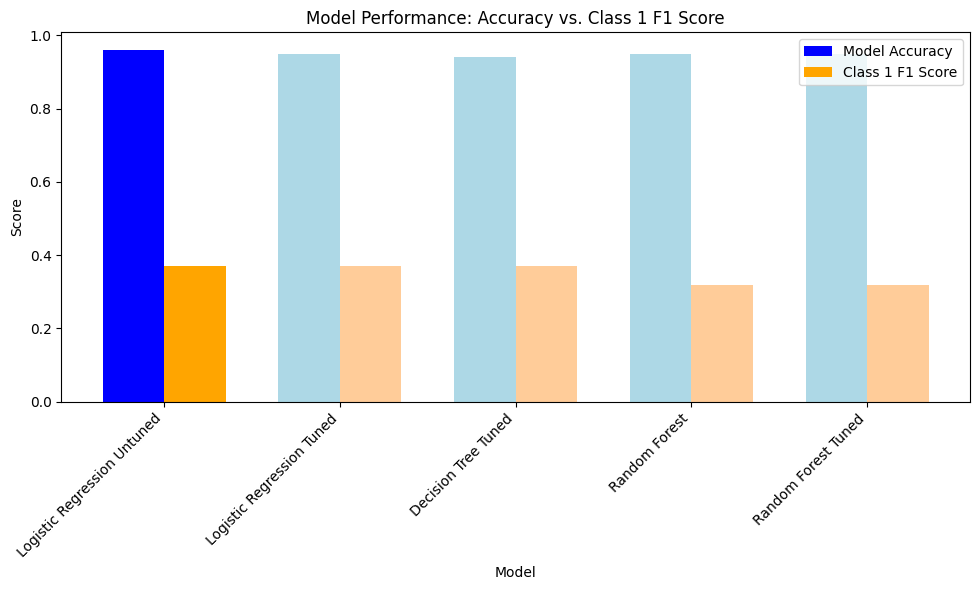

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their respective scores
models = ['Logistic Regression Untuned', 'Logistic Regression Tuned',
          'Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned']
model_accuracy = [0.96, 0.95, 0.94, 0.95, 0.95]
class_1_f1 = [0.37, 0.37, 0.37, 0.32, 0.32]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions and width for the bars
positions = np.arange(len(models))
bar_width = 0.35

# Brighter hues for 'Logistic Regression Tuned'
bright_blue = '#0000FF'  # Bright blue color
bright_orange = '#FFA500'  # Bright orange color

# Standard hues for other models
standard_blue = '#add8e6'  # Light blue color
standard_orange = '#ffcc99'  # Light orange color

# Define bar colors based on the model
accuracy_colors = [bright_blue if model == 'Logistic Regression Untuned' else standard_blue for model in models]
f1_score_colors = [bright_orange if model == 'Logistic Regression Untuned' else standard_orange for model in models]

# Plot the 'Model Accuracy' bars
ax.bar(positions - bar_width/2, model_accuracy, bar_width, label='Model Accuracy', color=accuracy_colors)

# Plot the 'Class 1 F1 Score' bars
ax.bar(positions + bar_width/2, class_1_f1, bar_width, label='Class 1 F1 Score', color=f1_score_colors)

# Add the model names as x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(models, rotation=45, ha='right')

# Set the chart title and labels
ax.set_title('Model Performance: Accuracy vs. Class 1 F1 Score')
ax.set_xlabel('Model')
ax.set_ylabel('Score')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
smote_df = pd.read_csv('model_data.csv')

# Separate into features and target variable
X = smote_df.drop('race_win', axis=1)
y = smote_df['race_win']

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
sm = SMOTE(random_state=42)

# Fit SMOTE to the training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [ ]:
# SMOTE output is `X_train_resampled` and `y_train_resampled`
df_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)  # Use original feature names
df_resampled['target'] = y_train_resampled  # Add target variable column

<ipython-input-45-6b4b0ef62567>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['target'] = y_train_resampled  # Add target variable column


In [ ]:
# Original class distribution
original_classes, original_counts = np.unique(y_train, return_counts=True)
print("Original class distribution:", dict(zip(original_classes, original_counts)))

# Resampled class distribution
resampled_classes, resampled_counts = np.unique(y_train_resampled, return_counts=True)
print("Resampled class distribution:", dict(zip(resampled_classes, resampled_counts)))

Original class distribution: {False: 8319, True: 417}
Resampled class distribution: {False: 8319, True: 8319}


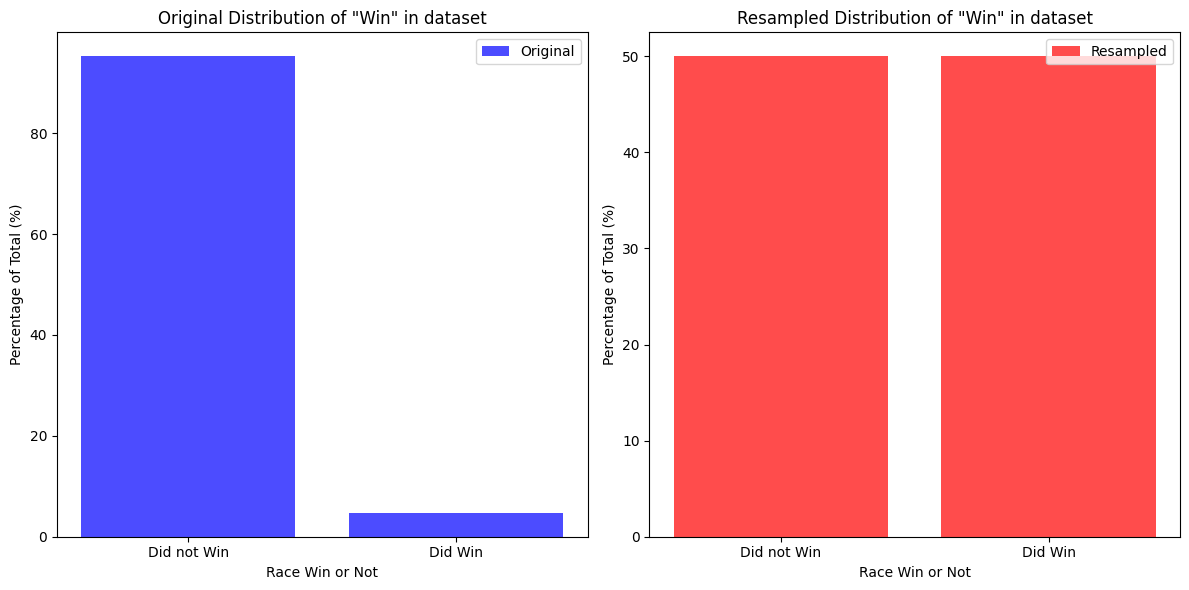

In [ ]:
# Get the normalized value counts for the 'race_win' column and multiply by 100 to get percentages
original_value_counts = train_data['race_win'].value_counts(normalize=True) * 100

# Get the normalized value counts for the resampled data and multiply by 100 to get percentages
resampled_value_counts = pd.Series(y_train_resampled).value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))

# Plot for original data
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(original_value_counts.index.astype(str), original_value_counts.values, color='b', alpha=0.7, label='Original')
plt.xlabel('Race Win or Not')
plt.ylabel('Percentage of Total (%)')
plt.title('Original Distribution of "Win" in dataset')
plt.xticks([0, 1], ['Did not Win', 'Did Win'])
plt.legend()

# Plot for resampled data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(resampled_value_counts.index.astype(str), resampled_value_counts.values, color='r', alpha=0.7, label='Resampled')
plt.xlabel('Race Win or Not')
plt.ylabel('Percentage of Total (%)')
plt.title('Resampled Distribution of "Win" in dataset')
plt.xticks([0, 1], ['Did not Win', 'Did Win'])
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Determine the indices of the new samples
new_sample_indices = [i for i in range(len(y_train_resampled)) if i >= len(y_train)]

# Display the new samples
print("Newly generated samples:")
print(X_train_resampled.iloc[new_sample_indices, :].head())


Newly generated samples:
      race_index  year  driverId  F2_champion  Former_F1_World_Champion  \
8736         520  2022       830        False                      True   
8737         503  2022       831        False                      True   
8738         517  2022       830        False                      True   
8739         424  2018         1         True                      True   
8740         289  2010        17        False                      True   

      home_race  constructorId  starting_grid_position  \
8736      False              9                       1   
8737      False              6                       1   
8738      False              9                       1   
8739      False            131                       2   
8740      False              1                       2   

      points_in_previous_race  laps_in_previous_race  new_index  \
8736                23.835146              70.194142       1350   
8737                19.061580            

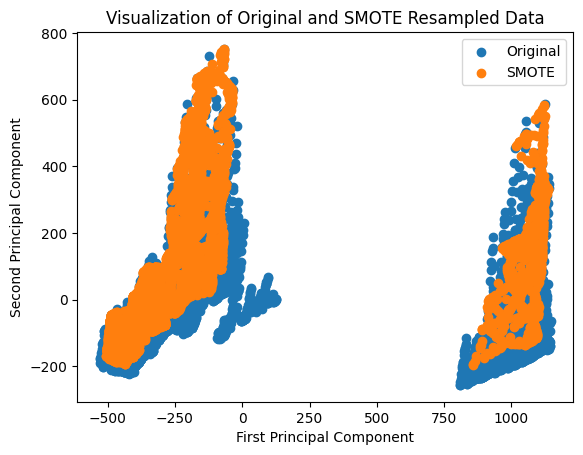

In [ ]:
# Reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_resampled)

# Plot the original samples and the synthetic samples
plt.scatter(X_train_pca[:len(y_train), 0], X_train_pca[:len(y_train), 1], label='Original')
plt.scatter(X_train_pca[len(y_train):, 0], X_train_pca[len(y_train):, 1], label='SMOTE')
plt.legend()
plt.title('Visualization of Original and SMOTE Resampled Data')
plt.xlabel('First Principal Component') # Label for the x-axis
plt.ylabel('Second Principal Component') # Label for the y-axis
plt.show()


In [ ]:
# Create pipelines for each model
pipe_lr = Pipeline([
    ('scl', StandardScaler()),
    ('dim_reducer', PCA()),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

pipe_dt = Pipeline([
    ('scl', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

pipe_rf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

In [ ]:
# Create parameter grids for each model
# Let's try the same range of C values from earlier
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Parameter grid
lr_param_grid = {
    'clf__C': c_values,  # Corrected from 'model__C' to 'clf__C'
    'clf__penalty': ['l2'],  # lbfgs supports only 'l2' or 'none'
    # Include other parameters if needed
}

dt_param_grid = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6],
                  'clf__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                  'clf__min_samples_split': [2, 3, 4, 5, 6]}]

rf_param_grid = [{
    'clf__n_estimators': [100, 200, 300, 400, 500, 600, 700],  # Prefix with 'clf__'
    'clf__max_depth': [10, 20, 30, 40, 50, 60],  # Prefix with 'clf__'
}]

In [ ]:
# Create a list to store GridSearchCV objects for each pipeline
grid_search_objects = []

In [ ]:
# Define a list of tuples to keep model and its grid parameters together
models_grids = [(pipe_lr, lr_param_grid), (pipe_dt, dt_param_grid), (pipe_rf, rf_param_grid)]

In [ ]:
# Perform GridSearchCV for each model
for pipe, param_grid in models_grids:
    gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=5,
                      n_jobs=-1,
                      verbose=1)
    gs.fit(X_train_resampled, y_train_resampled)
    grid_search_objects.append(gs)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 42 candidates, totalling 210 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Now each model has been fitted, we can inspect them
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 2: 'Random Forest'}
for i, gs in enumerate(grid_search_objects):
    print(f"{grid_dict[i]} Test Accuracy: {gs.score(X_test, y_test)}")
    print(f"{grid_dict[i]} Best Params: {gs.best_params_}")

Logistic Regression Test Accuracy: 0.9464530892448513
Logistic Regression Best Params: {'clf__C': 10, 'clf__penalty': 'l2'}
Decision Trees Test Accuracy: 0.91441647597254
Decision Trees Best Params: {'clf__criterion': 'gini', 'clf__max_depth': 12, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 3}
Random Forest Test Accuracy: 0.9450800915331807
Random Forest Best Params: {'clf__max_depth': 30, 'clf__n_estimators': 300}


In [ ]:
# grid_search_objects is a list of GridSearchCV objects
for i, gs in enumerate(grid_search_objects):
    # Predict using the best estimator found in the grid search
    y_pred = gs.best_estimator_.predict(X_test)

    # Print model name
    print(f"Model: {grid_dict[i]}")

    # Classification report
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()  # Add an empty line for better readability

Model: Logistic Regression
Classification report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97      2077
        True       0.46      0.43      0.44       108

    accuracy                           0.95      2185
   macro avg       0.71      0.70      0.71      2185
weighted avg       0.94      0.95      0.95      2185

Confusion matrix:
[[2022   55]
 [  62   46]]

Model: Decision Trees
Classification report:
              precision    recall  f1-score   support

       False       0.98      0.93      0.95      2077
        True       0.31      0.59      0.41       108

    accuracy                           0.91      2185
   macro avg       0.64      0.76      0.68      2185
weighted avg       0.94      0.91      0.93      2185

Confusion matrix:
[[1934  143]
 [  44   64]]

Model: Random Forest
Classification report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97      2077
      

In [ ]:
import pickle

# grid_search_objects contains GridSearchCV fitted models
for i, gs in enumerate(grid_search_objects):
    model_name = grid_dict[i].replace(" ", "_").lower()  # Creating a filename-friendly version of the model name
    filename = f"{model_name}_grid_search.pkl"

    with open(filename, 'wb') as file:
        pickle.dump(gs, file)

    print(f"Saved {grid_dict[i]} model to {filename}")

Saved Logistic Regression model to logistic_regression_grid_search.pkl
Saved Decision Trees model to decision_trees_grid_search.pkl
Saved Random Forest model to random_forest_grid_search.pkl


In [ ]:
# For each model, predict the race_win values and create a CSV
for i, gs in enumerate(grid_search_objects):
    model_name = grid_dict[i]

    # Create a DataFrame for predictions
    predictions_df = X_test.copy()
    predictions_df['Predicted_Winner'] = gs.predict(X_test)

    # Define the path to save the CSV file
    save_path = f"{model_name}_predictions.csv"

    # Export each model's prediction to a separate CSV file in the specified directory
    predictions_df.to_csv(save_path, index=False)

# 10. **What model to choose?**

In [ ]:
# Real scores from models
model_names = ['Logistic Regression Untuned', 'Logistic Regression Tuned', 'Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned', 'Logistic Regression SMOTE', 'Decision Tree SMOTE', 'Random Forest SMOTE']
accuracies = [0.96, 0.95, 0.94, 0.95, 0.95, 0.94, 0.91, 0.95]  # Replace with actual accuracy scores
macro_f1s = [0.67, 0.67, 0.67, 0.65, 0.65, 0.70, 0.68, 0.72]  # Replace with actual macro F1 scores
precisions = [0.63, 0.46, 0.42, 0.49, 0.49, 0.43, 0.31, 0.45]  # Replace with actual precision scores
recalls = [0.26, 0.31, 0.33, 0.24, 0.24, 0.42, 0.59, 0.50] # Replace with actual recall scores
class_1_f1s = [0.37, 0.37, 0.37, 0.32, 0.32, 0.42, 0.41, 0.48]  # Replace with actual '1' F1 scores

# Initialize the DataFrame with these lists
results_df = pd.DataFrame({
    'Model': model_names,
    'Model Accuracy': accuracies,
    'Macro F1': macro_f1s,
    'Class 1 Precision': precisions,
    'Class 1 Recall': recalls,
    'Class 1 F1': class_1_f1s
})

# Display the DataFrame
results_df


,Model,Model Accuracy,Macro F1,Class 1 Precision,Class 1 Recall,Class 1 F1
0,Logistic Regression Untuned,0.96,0.67,0.63,0.26,0.37
1,Logistic Regression Tuned,0.95,0.67,0.46,0.31,0.37
2,Decision Tree Tuned,0.94,0.67,0.42,0.33,0.37
3,Random Forest,0.95,0.65,0.49,0.24,0.32
4,Random Forest Tuned,0.95,0.65,0.49,0.24,0.32
5,Logistic Regression SMOTE,0.94,0.70,0.43,0.42,0.42
6,Decision Tree SMOTE,0.91,0.68,0.31,0.59,0.41
7,Random Forest SMOTE,0.95,0.72,0.45,0.50,0.48


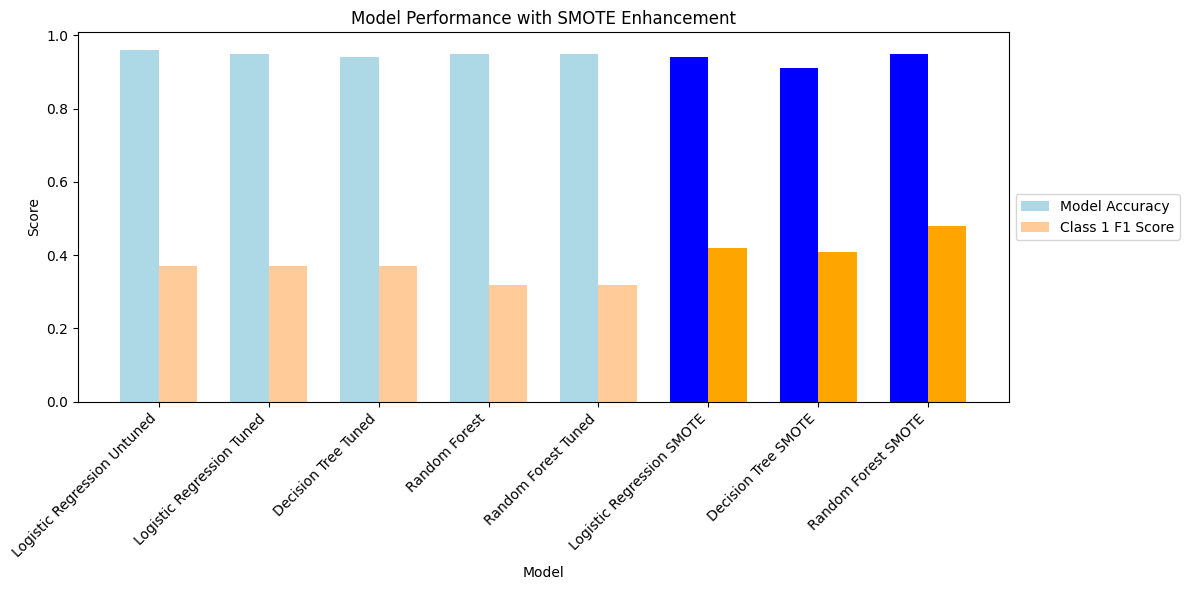

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their respective scores
models = ['Logistic Regression Untuned', 'Logistic Regression Tuned',
          'Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned',
          'Logistic Regression SMOTE', 'Decision Tree SMOTE', 'Random Forest SMOTE']
model_accuracy = [0.96, 0.95, 0.94, 0.95, 0.95, 0.94, 0.91, 0.95]
class_1_f1 = [0.37, 0.37, 0.37, 0.32, 0.32, 0.42, 0.41, 0.48]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the positions and width for the bars
positions = np.arange(len(models))
bar_width = 0.35

# Colors
standard_blue = '#add8e6'  # Light blue color
standard_orange = '#ffcc99'  # Light orange color
bright_blue = '#0000FF'  # Bright blue color
bright_orange = '#FFA500'  # Bright orange color

# Define bar colors based on whether the model uses SMOTE
model_accuracy_colors = [bright_blue if 'SMOTE' in model else standard_blue for model in models]
class_1_f1_colors = [bright_orange if 'SMOTE' in model else standard_orange for model in models]

# Plot the 'Model Accuracy' bars
ax.bar(positions - bar_width/2, model_accuracy, bar_width, label='Model Accuracy', color=model_accuracy_colors)

# Plot the 'Class 1 F1 Score' bars
ax.bar(positions + bar_width/2, class_1_f1, bar_width, label='Class 1 F1 Score', color=class_1_f1_colors)

# Add the model names as x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(models, rotation=45, ha='right')

# Set the chart title and labels
ax.set_title('Model Performance with SMOTE Enhancement')
ax.set_xlabel('Model')
ax.set_ylabel('Score')

# Add a legend to explain the colors and move it to the left outside of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Accuracy scores for each model
accuracies = [0.96, 0.95, 0.94, 0.95, 0.95, 0.94, 0.91, 0.95]
models = [
    'Logistic Regression Untuned', 'Logistic Regression Tuned',
    'Decision Tree Tuned', 'Random Forest Untuned',
    'Random Forest Tuned', 'Logistic Regression SMOTE',
    'Decision Trees SMOTE', 'Random Forest SMOTE'
]

# Colors for the bars - red if the score is the maximum, blue otherwise
colors = ['red' if accuracy == max(accuracies) else 'blue' for accuracy in accuracies]

# Create bar chart
fig = go.Figure([go.Bar(x=models, y=accuracies, marker_color=colors)])
fig.update_layout(
    title='Logistics Regressions (Untuned and Tuned) Shows Highest Overall Accuracy',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    yaxis=dict(range=[0.85, 1])
)
fig.show()


In [ ]:
# Recall scores for the winner class for each model
recalls = [0.26, 0.31, 0.33, 0.24, 0.24, 0.42, 0.59, 0.50]

# Colors for the bars - red if the score is the maximum, blue otherwise
colors = ['red' if recall == max(recalls) else 'blue' for recall in recalls]

# Create bar chart
fig = go.Figure([go.Bar(x=models, y=recalls, marker_color=colors)])
fig.update_layout(
    title='"Decision Trees SMOTE Achieves Highest Recall for Predicting Winners"',
    xaxis_title='Model',
    yaxis_title='Recall',
    yaxis=dict(range=[0, 1])
)
fig.show()

In [ ]:
# Precision scores for the winner class for each model
precisions = [0.63, 0.46, 0.42, 0.49, 0.49, 0.43, 0.31, 0.45]

# Colors for the bars - red if the score is the maximum, blue otherwise
colors = ['red' if precision == max(precisions) else 'blue' for precision in precisions]

# Create bar chart
fig = go.Figure([go.Bar(x=models, y=precisions, marker_color=colors)])
fig.update_layout(
    title='Logistic Regression (Untuned) Achieved Highest Precision for Winner Predictions',
    xaxis_title='Model',
    yaxis_title='Precision',
    yaxis=dict(range=[0, 1])
)
fig.show()


In [ ]:
import plotly.graph_objects as go

# F1 macro average scores for each model
f1_scores = [0.37, 0.37, 0.37, 0.32, 0.32, 0.42, 0.41, 0.48]
models = [
    'Logistic Regression Untuned', 'Logistic Regression Tuned',
    'Decision Tree Tuned', 'Random Forest Untuned',
    'Random Forest Tuned', 'Logistic Regression SMOTE',
    'Decision Trees SMOTE', 'Random Forest SMOTE'
]

# Colors for the bars - red if the score is the maximum, blue otherwise
colors = ['red' if f1_score == max(f1_scores) else 'blue' for f1_score in f1_scores]

# Create bar chart
fig = go.Figure([go.Bar(x=models, y=f1_scores, marker_color=colors)])
fig.update_layout(
    title='Comparison of Class 1 F1 Scores Across Models',
    xaxis_title='Model',
    yaxis_title='Class 1 F1 Score',
    yaxis=dict(range=[0, 1])
)
fig.show()


In [ ]:
print("enter")

enter
